In [1]:
from matplotlib import animation, rc, cm, pyplot as plt
from celluloid import Camera
from IPython.display import HTML
import numpy as np
from scipy.sparse import csr_matrix
from tqdm import tqdm
from IPython.display import clear_output
from time import sleep
from matplotlib.pyplot import figure
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.interpolate import griddata

In [2]:
from scipy import sparse
from scipy.sparse.linalg import spsolve

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from FiniteElements.MeshUtils import Mesh

In [5]:
mesh = Mesh(63)

In [6]:
solution=mesh.solve(lambda x,y: (x-3/4)-(y-np.sqrt(3)/4))

/home/revealo/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [7]:
np.max(solution)

25.305645294544085

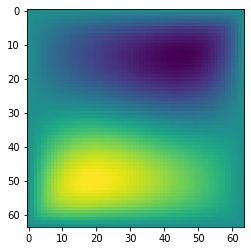

In [8]:
plt.imshow(solution.reshape(64, 64))

In [9]:
def surface_plot(viewing_angle):
    X = mesh._vertices - np.array([3/4, np.sqrt(3)/4]).reshape(1, -1)
    _x = X[:,0]
    _y = X[:,1]

    L=1000
    x=np.linspace(-1, 1, L)
    y=np.linspace(-1, 1, L)
    xv, yv = np.meshgrid(x, y)
    z = griddata((_x, _y) ,solution, (xv, yv), method='linear')
    z[np.isnan(z)] = 0.0

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(xv, yv, z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True)

    
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    ax.view_init(elev=None, azim=viewing_angle)
    plt.show()

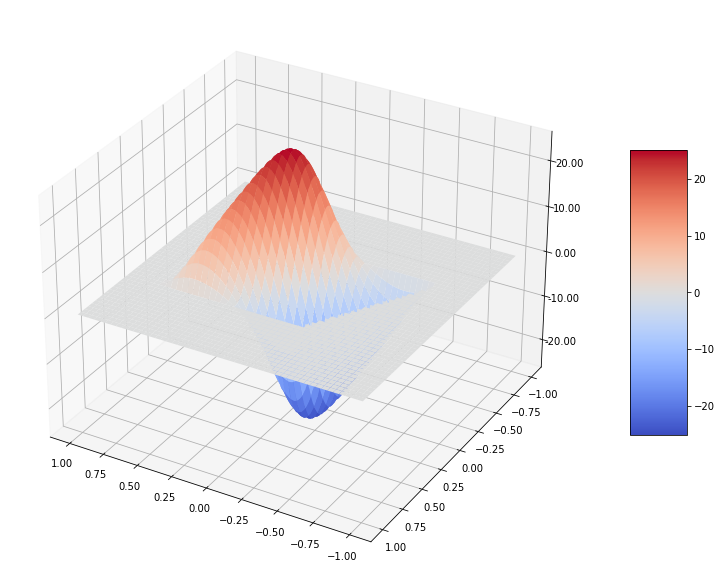

In [10]:
surface_plot(viewing_angle=120)

In [ ]:
np.linalg.norm(mesh._vertices[1])*np.sqrt(3) / 4

In [ ]:
vertices = mesh._vertices
faces = mesh._faces
col = list()
row = list()
data = list()
for vertex in tqdm(range(vertices.shape[0])):
    spare = set(faces[np.max(np.isin(faces, vertex), axis=1),:].flatten().tolist())
    col += list(spare)
    row += [vertex for _ in spare]
    for adj_vertex in spare:
        break
        cf = get_common_faces(adj_vertex, vertex, faces).reshape(-1,3)
        matrix = np.concatenate([vertices[cf], np.ones((cf.shape[0],3,1))], axis=2)
        zero = [np.linalg.solve(A, (val==vertex).astype(float))[:2] for A,val in zip(matrix,cf)]
        one = [np.linalg.solve(A, (val==adj_vertex).astype(float))[:2] for A,val in zip(matrix,cf)]
        res = [np.dot(z,o)*compute_area(vertices[tri]) for z, o, tri in zip(zero, one, cf)]
        data.append(np.sum(res))


#csr_matrix((data, (row, col)), shape=(vertices.shape[0], vertices.shape[0]))

In [ ]:
L=15000
x = np.linspace(0, 1, L)
y = np.linspace(0, 1, L)
xv, yv = np.meshgrid(x, y)
mesh = Mesh(1)

X=np.concatenate([xv.flatten().reshape(-1,1), yv.flatten().reshape(-1,1)], axis=1)
f1=mesh.get_shape_function.value_and_gradient[0]
f2=mesh.get_shape_function.value_and_gradient[1]
plt.imshow((f1(X)[0] * f1(X)[0]).reshape((L,L)))
plt.show()
plt.axis('equal');
print(2*np.sum(f1(X)[0] * f2(X)[0])/((L - 1)*(L - 1))/(np.linalg.norm(mesh._vertices[1])**2*np.sqrt(3)/4))
print(np.sum(f1(X)[0] * f1(X)[0])/((L - 1)*(L - 1))/(np.linalg.norm(mesh._vertices[1])**2*np.sqrt(3)/4))
print(np.linalg.norm(mesh._vertices[1]))

In [ ]:
5/30

In [ ]:
vertices[63]

In [ ]:
vertices[list(spare)]

In [ ]:
x = np.linspace(0, 2, 100)
y = np.linspace(-0.1, 1, 100)
xv, yv = np.meshgrid(x, y)

X=np.concatenate([xv.flatten().reshape(-1,1), yv.flatten().reshape(-1,1)], axis=1)
f=mesh.get_shape_function(63)
plt.imshow(f(X)[0].reshape((100,100)))
plt.show()
f=mesh.get_shape_function(62)
plt.imshow(f(X)[0].reshape((100,100)))
plt.show()
f=mesh.get_shape_function(55)
plt.imshow(f(X)[0].reshape((100,100)))
plt.show()
plt.axis('equal');



In [ ]:
cf = get_common_faces(adj_vertex, vertex, faces).reshape(-1,3)
        

In [ ]:
cf

In [ ]:
matrix = np.concatenate([vertices[cf], np.ones((cf.shape[0],3,1))], axis=2)
zero = [np.linalg.solve(A, (val==vertex).astype(float))[:2] for A,val in zip(matrix,cf)]
one = [np.linalg.solve(A, (val==adj_vertex).astype(float))[:2] for A,val in zip(matrix,cf)]
res = [np.dot(z,o)*compute_area(vertices[tri]) for z, o, tri in zip(zero, one, cf)]
data.append(np.sum(res))

In [ ]:
matrix

In [ ]:
list(zip(matrix,cf))

In [ ]:
zero

In [ ]:
one

In [ ]:
res

In [ ]:
mesh = Mesh(7)

In [ ]:
x = np.linspace(0, 2, 100)
y = np.linspace(-0.1, 1, 100)
xv, yv = np.meshgrid(x, y)

camera = Camera(plt.figure())
for k in range(mesh.number_of_elements):
    X=np.concatenate([xv.flatten().reshape(-1,1), yv.flatten().reshape(-1,1)], axis=1)
    f=mesh.get_shape_function(k)
    plt.imshow(f(X)[0].reshape((100,100)))
    plt.axis('equal');
    camera.snap()
anim = camera.animate(blit=True)
clear_output()


In [ ]:
HTML(anim.to_html5_video())

In [ ]:
x = np.linspace(0, 2, 50)
y = np.linspace(-1, 1, 50)
xv, yv = np.meshgrid(x, y)

In [ ]:
X=np.concatenate([xv.flatten().reshape(-1,1), yv.flatten().reshape(-1,1)], axis=1)
f=mesh.get_shape_function(120)
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(f(X)[0].reshape((50, 50)))

plt.axis('equal');

In [ ]:
X=np.concatenate([xv.flatten().reshape(-1,1), yv.flatten().reshape(-1,1)], axis=1)
z=f(X)[1]
fig, ax = plt.subplots()
q = ax.quiver(xv,yv,z[:,0],z[:,1],scale=200)
plt.show()


In [ ]:
x = np.linspace(0.5, 1.2, 50)
y = np.linspace(0.0, 0.6, 50)
xv, yv = np.meshgrid(x, y)

In [ ]:
np.gradient?

In [ ]:
X=np.concatenate([xv.flatten().reshape(-1,1), yv.flatten().reshape(-1,1)], axis=1)
z=f(X)[0].reshape((50, 50))
u,v =np.gradient(z,0.2,0.2)
fig, ax = plt.subplots()
q = ax.quiver(xv,yv,u,v,scale=10)
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(f(X)[0].reshape((50, 50)))
plt.show()

In [ ]:
mesh._vertices.shape

In [ ]:
for x in range(1,16):
    fg+= mesh.get_shape_function(x)(X).reshape((100,100))

In [ ]:
f=mesh.get_shape_function(0)
plt.imshow(fg.reshape((100,100)))